In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 100000
G

<disgten.Generator with input: 
n_particle: 100000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
G.run()
G.particles

<ParticleGroup with 100000 particles at 0x7f7f83ee6cd0>

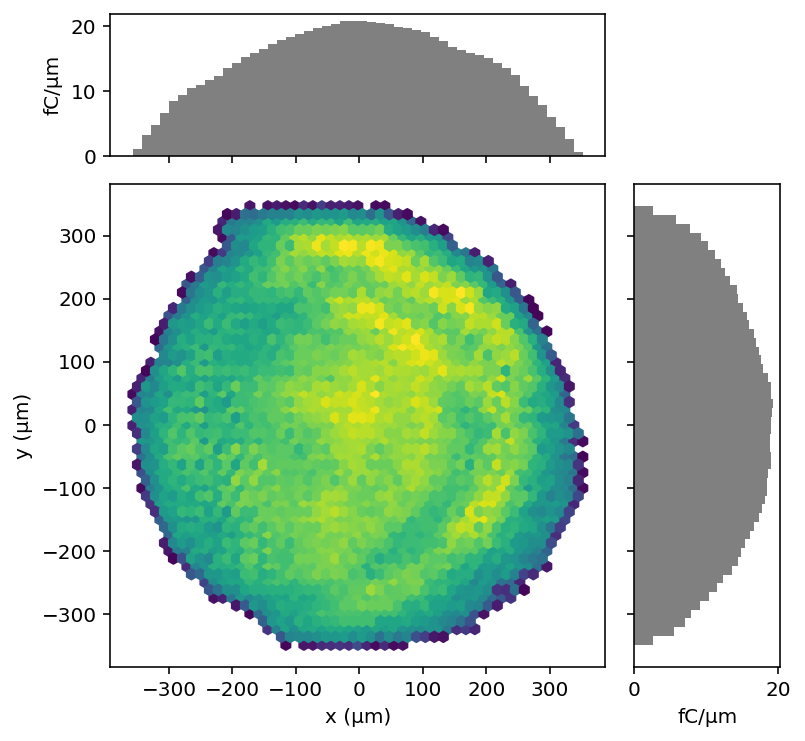

In [5]:
G.particles.plot('x', 'y', bins=50)

In [6]:
from impact import Impact

In [7]:
I = Impact('ImpactT.in', initial_particles=G.particles)

In [8]:
# Turn space charge off
I.total_charge = 0
I.stop = 0.5

In [9]:
I.run()

In [10]:
I.output.keys()

dict_keys(['run_info', 'stats', 'slice_info', 'particles'])

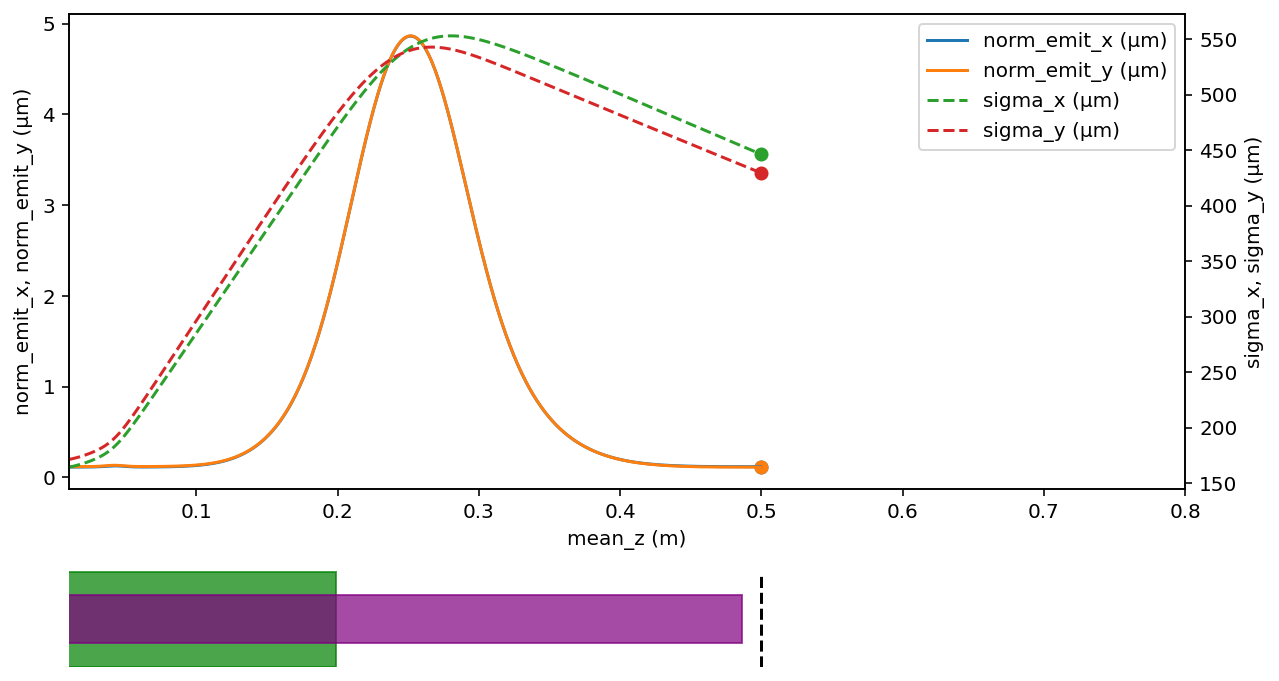

In [12]:
I.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(0.01, 0.8), figsize=(10,6))

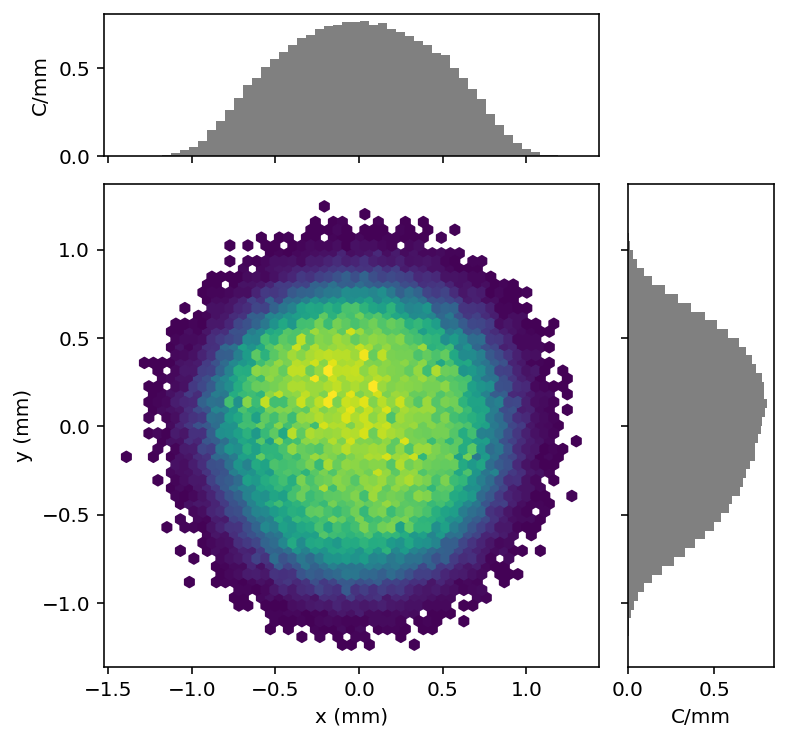

In [13]:
I.particles['final_particles'].plot('x', 'y', bins=50)

In [14]:
I.archive()

'impact_f718655836292d6ebb06860a0323b529.h5'

In [15]:
!rm *h5